In [1]:
# 1. What are 3 areas in industry where computer vision is currently being used?
"""Computer vision is being used in numerous industries to solve various problems. Here are three areas where computer vision is currently being applied:

Autonomous Vehicles: Computer vision plays a crucial role in enabling autonomous vehicles to perceive and understand their surroundings. It helps in tasks such as object detection, lane detection, traffic sign recognition, pedestrian detection, and collision avoidance. Computer vision algorithms analyze real-time data from cameras mounted on vehicles to make decisions and navigate safely.

Manufacturing and Quality Control: Computer vision is extensively used in manufacturing industries for quality control and inspection purposes. It can automate the detection of defects, anomalies, or errors in products by analyzing images or videos captured during the production process. Computer vision systems can identify imperfections, measure dimensions, verify product integrity, and ensure adherence to manufacturing standards.

Healthcare: Computer vision has numerous applications in healthcare, including medical imaging analysis, disease diagnosis, and surgical assistance. It aids in the interpretation of medical images, such as X-rays, MRI scans, and pathology slides, to detect abnormalities, tumors, or other medical conditions. Computer vision can also assist in surgical procedures by providing real-time guidance, tracking surgical instruments, and enhancing the accuracy of interventions.

"""

'Computer vision is being used in numerous industries to solve various problems. Here are three areas where computer vision is currently being applied:\n\nAutonomous Vehicles: Computer vision plays a crucial role in enabling autonomous vehicles to perceive and understand their surroundings. It helps in tasks such as object detection, lane detection, traffic sign recognition, pedestrian detection, and collision avoidance. Computer vision algorithms analyze real-time data from cameras mounted on vehicles to make decisions and navigate safely.\n\nManufacturing and Quality Control: Computer vision is extensively used in manufacturing industries for quality control and inspection purposes. It can automate the detection of defects, anomalies, or errors in products by analyzing images or videos captured during the production process. Computer vision systems can identify imperfections, measure dimensions, verify product integrity, and ensure adherence to manufacturing standards.\n\nHealthcare:

In [2]:
# 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 
"""Overfitting in machine learning refers to a situation where a model becomes too specialized or closely "fits" the training data, to the point that it performs poorly on new, unseen data. This occurs when the model learns the noise and irrelevant patterns in the training data, instead of capturing the underlying generalizable patterns."""

'Overfitting in machine learning refers to a situation where a model becomes too specialized or closely "fits" the training data, to the point that it performs poorly on new, unseen data. This occurs when the model learns the noise and irrelevant patterns in the training data, instead of capturing the underlying generalizable patterns.'

In [3]:
# 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
"""Here are three common techniques to prevent overfitting in machine learning:

Cross-Validation: Cross-validation is a technique where the available data is split into multiple subsets or folds. The model is then trained and evaluated on different combinations of these folds, allowing for a more robust assessment of its performance. By averaging the results, cross-validation helps to detect and mitigate overfitting by providing a more accurate estimate of the model's generalization performance.

Regularization: Regularization is a method that adds a penalty term to the loss function during model training. This penalty discourages the model from fitting the training data too closely and helps prevent overfitting. Common regularization techniques include L1 and L2 regularization, which introduce additional terms based on the magnitude of the model's weights, and help to simplify the model and reduce its reliance on individual data points.

Dropout: Dropout is a technique commonly used in neural networks. It randomly deactivates a proportion of neurons during each training iteration, forcing the network to learn redundant representations and preventing over-reliance on specific neurons. Dropout acts as a form of regularization by reducing complex co-adaptations between neurons, making the network more robust and less prone to overfitting."""

"Here are three common techniques to prevent overfitting in machine learning:\n\nCross-Validation: Cross-validation is a technique where the available data is split into multiple subsets or folds. The model is then trained and evaluated on different combinations of these folds, allowing for a more robust assessment of its performance. By averaging the results, cross-validation helps to detect and mitigate overfitting by providing a more accurate estimate of the model's generalization performance.\n\nRegularization: Regularization is a method that adds a penalty term to the loss function during model training. This penalty discourages the model from fitting the training data too closely and helps prevent overfitting. Common regularization techniques include L1 and L2 regularization, which introduce additional terms based on the magnitude of the model's weights, and help to simplify the model and reduce its reliance on individual data points.\n\nDropout: Dropout is a technique commonly u

In [4]:
# 4 Reading assignment 20 minutes

In [12]:
# 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
from torchvision import datasets
from torchvision.transforms import ToTensor
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

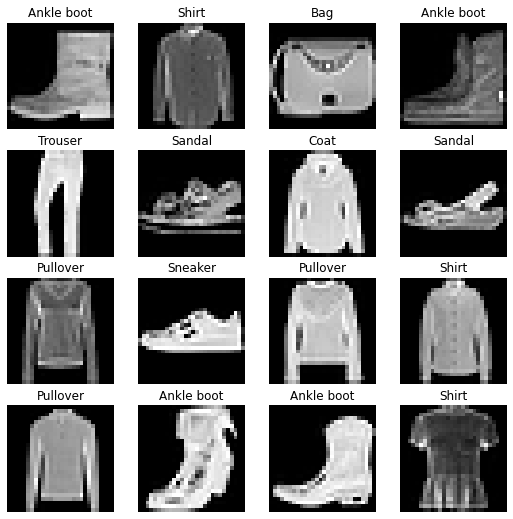

In [11]:
# 6. Visualize at least 5 different samples of the MNIST training dataset.

# Plot more images
import torch
import matplotlib.pyplot as plt
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False);

In [16]:
# 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
batch_size=32
from torch.utils.data.dataloader import DataLoader
# Create the train dataloader
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Create the test dataloader
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [20]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [21]:
# 
# Create a convolutional neural network 
from torch import nn
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(train_data.classes)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)